In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teis = pd.read_csv('data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})
teis.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25.0,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84.0,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5.0,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
teis.columns.tolist()

['Child ID',
 'Gender',
 'Date of Birth',
 'Location - Sub Level 1',
 'Program Label',
 'Adaptive Sum of Scaled Scores',
 'Adaptive Developmental Quotient',
 'Adaptive Percentile Rank',
 'Adaptive 95% Confidence Interval',
 'Adaptive RDI',
 'Adaptive Z-Score',
 'Adaptive T-Score',
 'Adaptive NCE',
 'Social-Emotional Sum of Scaled Scores',
 'Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank',
 'Social-Emotional 95% Confidence Interval',
 'Social-Emotional RDI',
 'Social-Emotional Z-Score',
 'Social-Emotional T-Score',
 'Social-Emotional NCE',
 'Communication Sum of Scaled Scores',
 'Communication Developmental Quotient',
 'Communication Percentile Rank',
 'Communication 95% Confidence Interval',
 'Communication RDI',
 'Communication Z-Score',
 'Communication T-Score',
 'Communication NCE',
 'Motor Sum of Scaled Scores',
 'Motor Developmental Quotient',
 'Motor Percentile Rank',
 'Motor 95% Confidence Interval',
 'Motor RDI',
 'Motor Z-Score',
 'Motor T-Score',

In [4]:
pulls = teis[['Child ID',
 'Gender',
 'Date of Birth',
 'Location - Sub Level 1',
 'Program Label','Adaptive Developmental Quotient',
 'Adaptive Percentile Rank','Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank','Communication Developmental Quotient',
 'Communication Percentile Rank','Motor Developmental Quotient',
 'Motor Percentile Rank','Cognitive Developmental Quotient',
 'Cognitive Percentile Rank',
 'BDI-3 Total Developmental Quotient',
 'BDI-3 Total Percentile Rank',
 'Adaptive-Self Care Examiner',
 'Adaptive-Self Care Date of Testing']]

In [5]:
pulls.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Developmental Quotient,Adaptive Percentile Rank,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Communication Developmental Quotient,Communication Percentile Rank,Motor Developmental Quotient,Motor Percentile Rank,Cognitive Developmental Quotient,Cognitive Percentile Rank,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,85.0,16.0,127.0,96.0,91.0,27.0,88.0,21.0,100.0,50.0,99.0,47.0,Kelly Bryan,2023-06-23
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,88.0,21.0,104.0,61.0,97.0,42.0,102.0,55.0,100.0,50.0,99.0,47.0,Patti Lyle,2023-03-21
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,90.0,25.0,91.0,27.0,82.0,12.0,109.0,73.0,83.0,13.0,89.0,23.0,Karen McMillion,2023-04-06
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,115.0,84.0,103.0,58.0,88.0,21.0,91.0,27.0,113.0,81.0,101.0,53.0,Jennifer Vines,2023-02-23
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,75.0,5.0,73.0,4.0,70.0,2.0,73.0,4.0,97.0,42.0,71.0,3.0,Ally Simmons,2023-02-24


6. Is there any difference in scoring noted based on evaluation type?

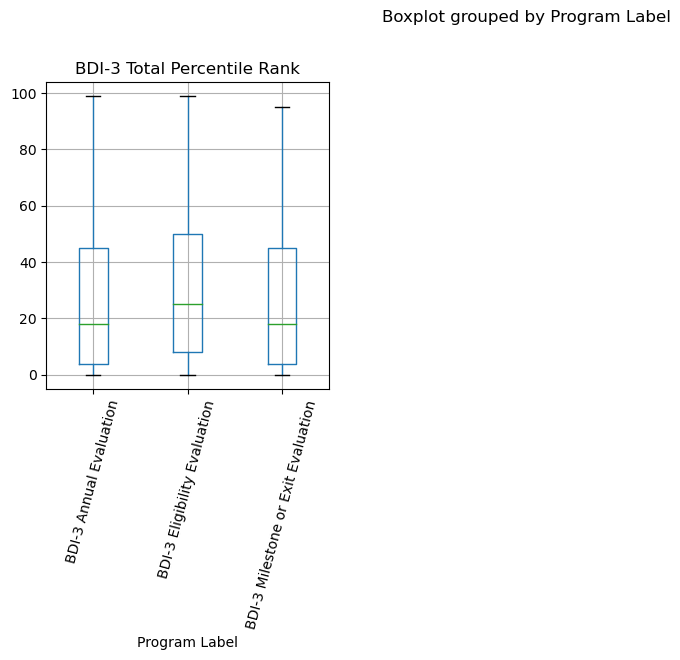

In [32]:
pulls.boxplot(column =['BDI-3 Total Percentile Rank'], by='Program Label', figsize=(12, 9), layout = (2, 3), rot=75
            );

In [6]:
eligibility_eval = pulls[pulls['Program Label'] == 'BDI-3 Eligibility Evaluation']
annual_eval = pulls[pulls['Program Label'] == 'BDI-3 Annual Evaluation']
milestone_exit_eval = pulls[pulls['Program Label'] == 'BDI-3 Milestone or Exit Evaluation']


In [7]:
eligibility_eval

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Developmental Quotient,Adaptive Percentile Rank,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Communication Developmental Quotient,Communication Percentile Rank,Motor Developmental Quotient,Motor Percentile Rank,Cognitive Developmental Quotient,Cognitive Percentile Rank,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,85.0,16.0,127.0,96.0,91.0,27.0,88.0,21.0,100.0,50.0,99.0,47.0,Kelly Bryan,2023-06-23
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,88.0,21.0,104.0,61.0,97.0,42.0,102.0,55.0,100.0,50.0,99.0,47.0,Patti Lyle,2023-03-21
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,90.0,25.0,91.0,27.0,82.0,12.0,109.0,73.0,83.0,13.0,89.0,23.0,Karen McMillion,2023-04-06
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,115.0,84.0,103.0,58.0,88.0,21.0,91.0,27.0,113.0,81.0,101.0,53.0,Jennifer Vines,2023-02-23
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,75.0,5.0,73.0,4.0,70.0,2.0,73.0,4.0,97.0,42.0,71.0,3.0,Ally Simmons,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23941,SP03286,F,2021-08-16,Memphis Delta,BDI-3 Eligibility Evaluation,130.0,98.0,96.0,39.0,91.0,27.0,117.0,87.0,110.0,75.0,109.0,73.0,Sara Duren,2023-11-15
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,115.0,84.0,115.0,84.0,112.0,79.0,118.0,88.0,113.0,81.0,119.0,90.0,Rachel Anderson,2023-11-15
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,115.0,84.0,116.0,86.0,112.0,79.0,117.0,87.0,122.0,93.0,119.0,90.0,Joanna Jones,2023-11-13
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,103.0,58.0,102.0,55.0,55.0,0.0,104.0,61.0,98.0,45.0,94.0,34.0,Joanna Jones,2023-11-14


In [8]:
numeric_score_columns = [col for col in pulls.columns if pd.api.types.is_numeric_dtype(pulls[col])]

In [9]:
mean_eligibility_numeric = eligibility_eval[numeric_score_columns].mean()
mean_annual_numeric = annual_eval[numeric_score_columns].mean()
mean_milestone_exit_numeric = milestone_exit_eval[numeric_score_columns].mean()
mean_scores_comparison_numeric = pd.DataFrame({
    'Eligibility Evaluation': mean_eligibility_numeric,
    'Annual Evaluation': mean_annual_numeric,
    'Milestone/Exit Evaluation': mean_milestone_exit_numeric
})

In [10]:
mean_scores_comparison_numeric

,Eligibility Evaluation,Annual Evaluation,Milestone/Exit Evaluation
Adaptive Developmental Quotient,89.184238,84.604570,85.460177
Adaptive Percentile Rank,31.997580,26.487637,28.064897
Social-Emotional Developmental Quotient,95.432432,93.072099,92.985251
Social-Emotional Percentile Rank,42.268253,38.351916,38.206490
Communication Developmental Quotient,81.181554,76.821106,75.530973
Communication Percentile Rank,22.647311,19.534358,19.575221
Motor Developmental Quotient,96.569629,90.875648,94.433628
Motor Percentile Rank,44.369177,36.929465,41.852507
Cognitive Developmental Quotient,91.002502,85.661963,84.578171
Cognitive Percentile Rank,34.354318,26.398946,23.315634


6. Is there any difference in scoring noted based on evaluation type? improvement between eligibility and exut, annual is scattered

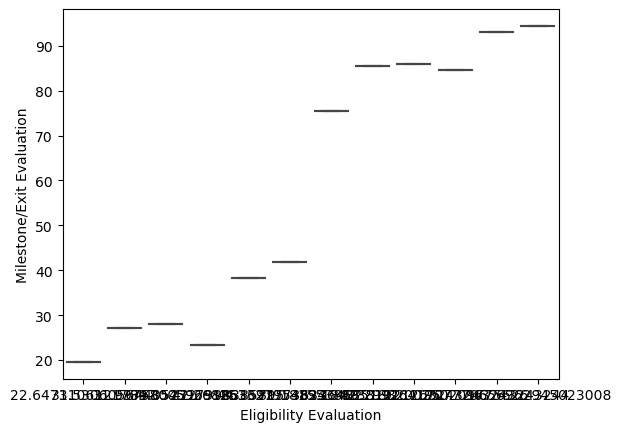

In [28]:
sns.boxplot(x=mean_scores_comparison_numeric["Eligibility Evaluation"], y=mean_scores_comparison_numeric["Milestone/Exit Evaluation"])
plt.show()

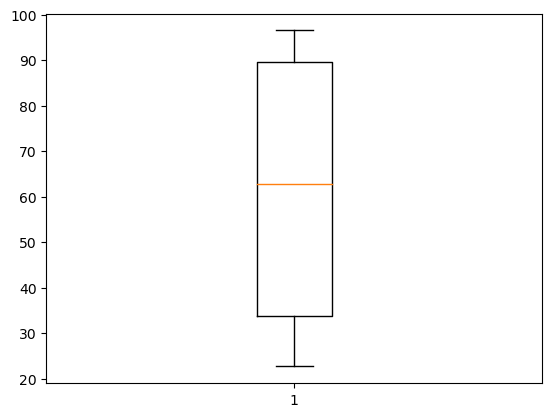

In [22]:
fig, ax = plt.subplots()
ax.boxplot(mean_scores_comparison_numeric["Eligibility Evaluation"])
plt.show()

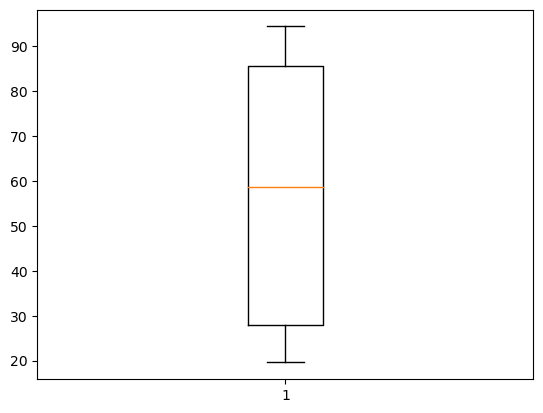

In [24]:
fig, ax = plt.subplots()
ax.boxplot(mean_scores_comparison_numeric["Milestone/Exit Evaluation"])
plt.show()

In [ ]:
pulls.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank', 'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'], by='Region', figsize=(12, 9), layout = (2, 3));

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

In [11]:
def Region(x):
    if x in ('East Tennessee', 'First Tennessee', 'Southeast Tennessee'):
        return 'East TN'
    elif x in ('Greater Nashville', 'Upper Cumberland', 'South Central'):
        return 'Middle TN'
    elif x in ('Northwest', 'Southwest', 'Memphis Delta'):
        return 'West TN'
pulls['Region'] = pulls['Location - Sub Level 1'].apply(Region)
pulls.head()

C:\Users\shand\AppData\Local\Temp\ipykernel_5748\3048673929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulls['Region'] = pulls['Location - Sub Level 1'].apply(Region)


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Developmental Quotient,Adaptive Percentile Rank,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Communication Developmental Quotient,Communication Percentile Rank,Motor Developmental Quotient,Motor Percentile Rank,Cognitive Developmental Quotient,Cognitive Percentile Rank,BDI-3 Total Developmental Quotient,BDI-3 Total Percentile Rank,Adaptive-Self Care Examiner,Adaptive-Self Care Date of Testing,Region
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,85.0,16.0,127.0,96.0,91.0,27.0,88.0,21.0,100.0,50.0,99.0,47.0,Kelly Bryan,2023-06-23,West TN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,88.0,21.0,104.0,61.0,97.0,42.0,102.0,55.0,100.0,50.0,99.0,47.0,Patti Lyle,2023-03-21,Middle TN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,90.0,25.0,91.0,27.0,82.0,12.0,109.0,73.0,83.0,13.0,89.0,23.0,Karen McMillion,2023-04-06,East TN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,115.0,84.0,103.0,58.0,88.0,21.0,91.0,27.0,113.0,81.0,101.0,53.0,Jennifer Vines,2023-02-23,East TN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,75.0,5.0,73.0,4.0,70.0,2.0,73.0,4.0,97.0,42.0,71.0,3.0,Ally Simmons,2023-02-24,West TN


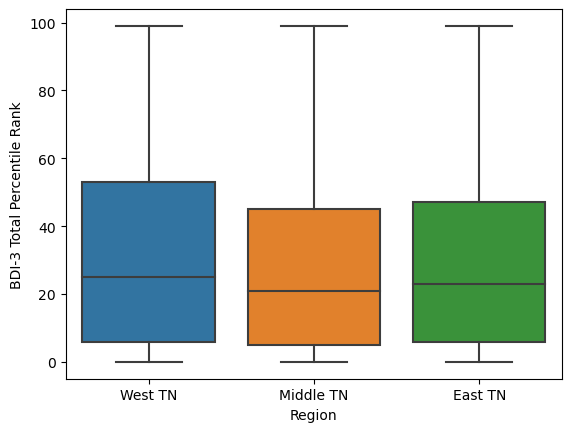

In [12]:
sns.boxplot( x=pulls["Region"], y=pulls["BDI-3 Total Percentile Rank"] );

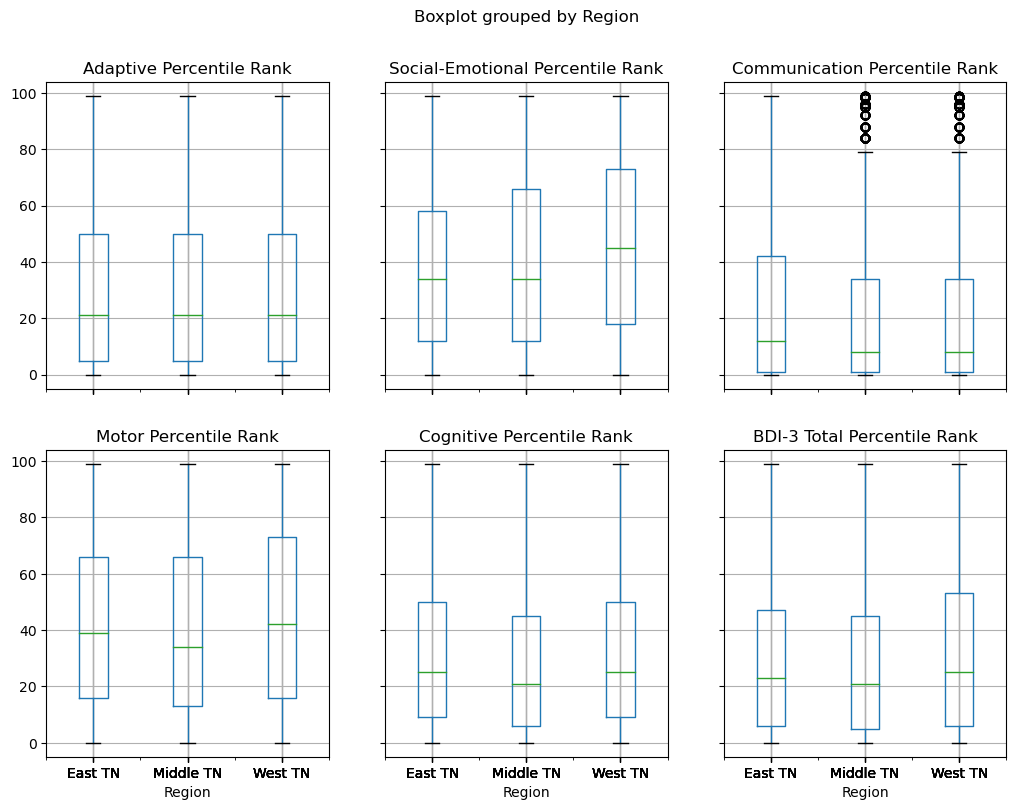

In [15]:
pulls.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank', 'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'], by='Region', figsize=(12, 9), layout = (2, 3));

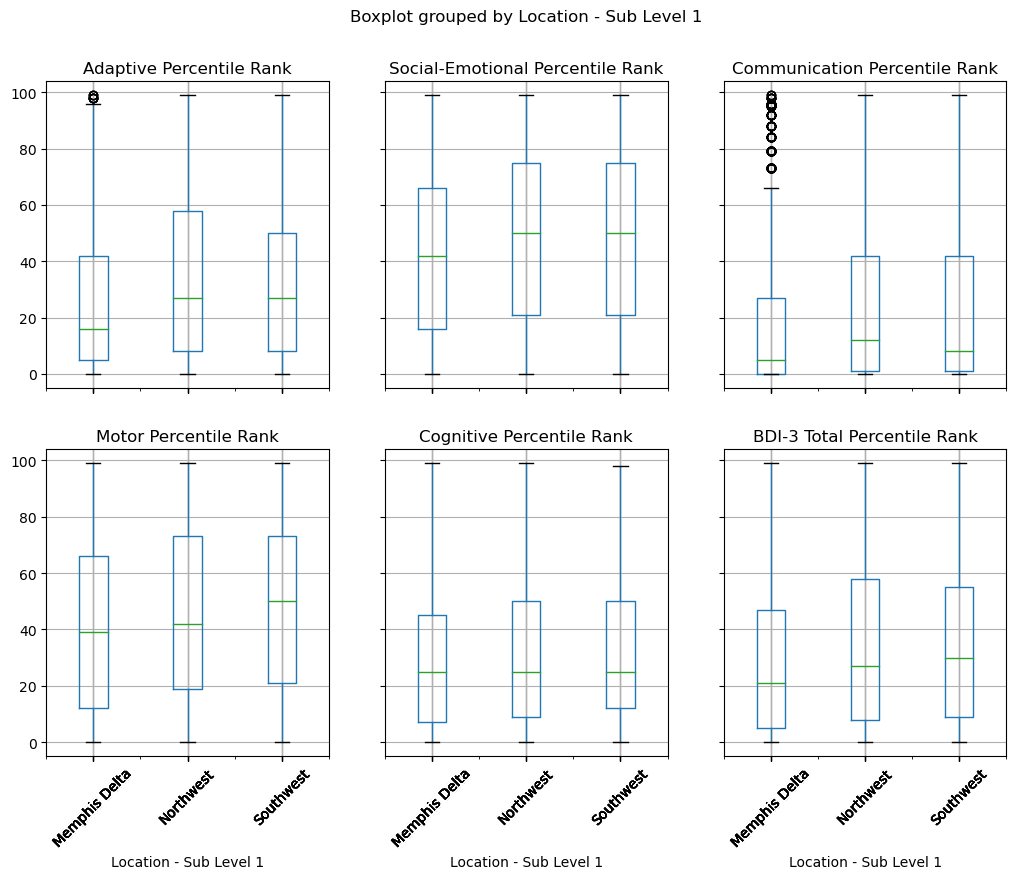

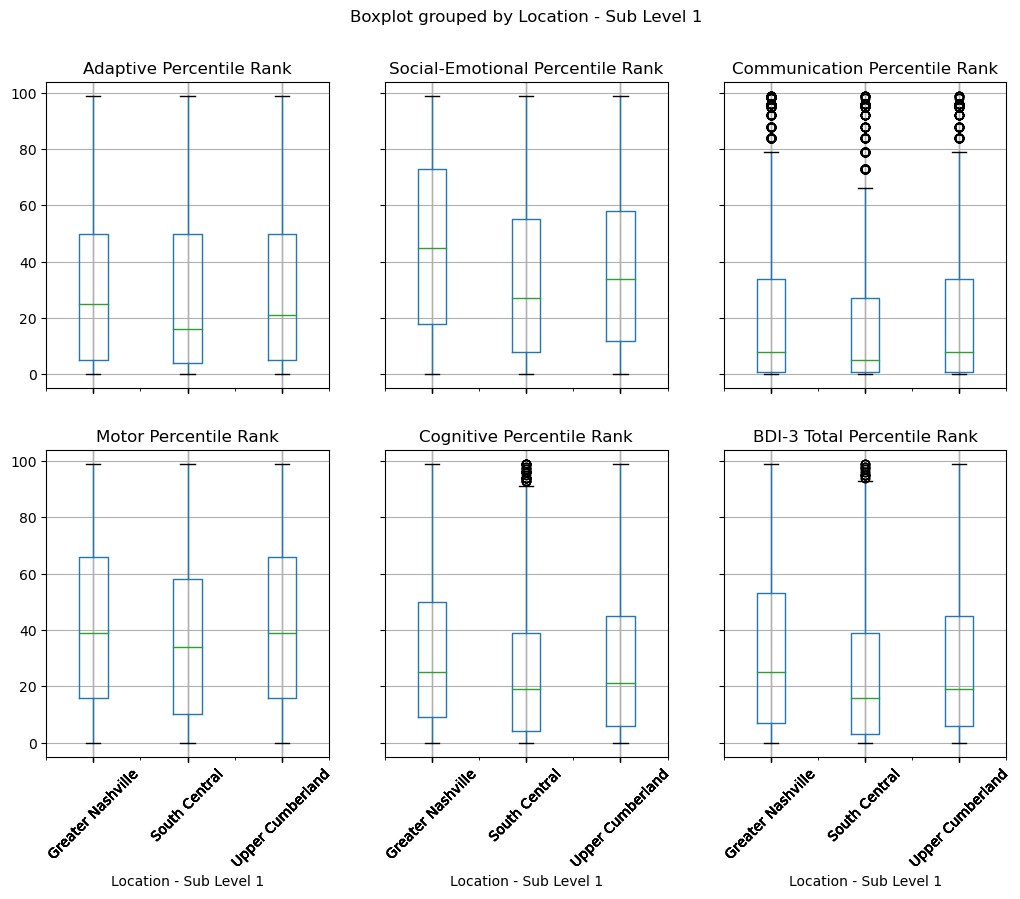

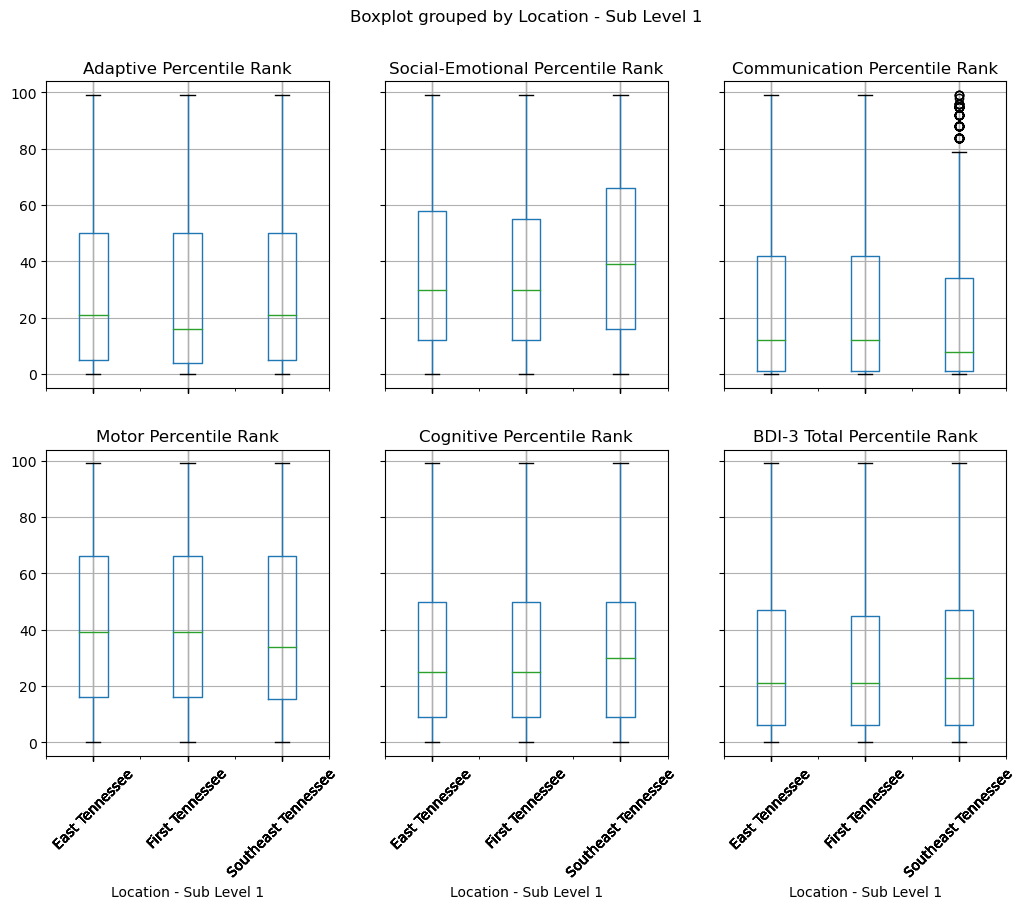

In [56]:
west = pulls.loc[pulls['Region'] == 'West TN']
middle = pulls.loc[pulls['Region'] == 'Middle TN']
east = pulls.loc[pulls['Region'] == 'East TN']

west.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',
                       'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'],
                        by='Location - Sub Level 1', figsize=(12, 9), layout = (2, 3), rot = 45)

middle.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',
                       'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'],
                        by='Location - Sub Level 1', figsize=(12, 9), layout = (2, 3), rot = 45)

east.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',
                       'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'],
                        by='Location - Sub Level 1', figsize=(12, 9), layout = (2, 3), rot = 45);

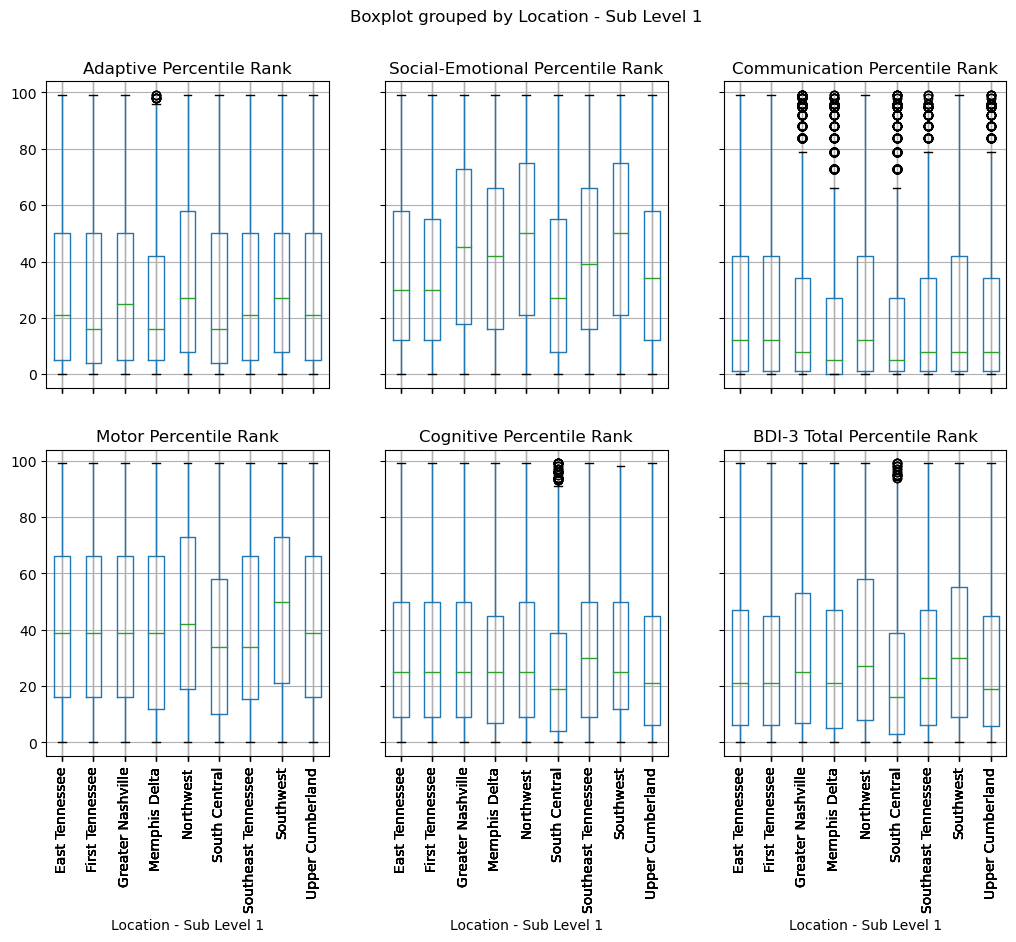

In [57]:
pulls.boxplot(column =['Adaptive Percentile Rank', 'Social-Emotional Percentile Rank', 'Communication Percentile Rank',
                       'Motor Percentile Rank', 'Cognitive Percentile Rank', 'BDI-3 Total Percentile Rank'],
                        by='Location - Sub Level 1', figsize=(12, 9), layout = (2, 3), rot = 90);

8. Is there any notable pattern of scoring by evaluator?

In [39]:
examiner_columns = [col for col in teis.columns if 'Examiner' in col]
teis.head(2)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16.0,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21.0,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
examiner_columns

['Adaptive-Self Care Examiner',
 'Adaptive-Personal Responsibility Examiner',
 'Social Emotional-Adult Interaction Examiner',
 'Social Emotional-Peer Interaction Examiner',
 'Social Emotional-Self Concept / Social Role Examiner',
 'Communication-Receptive Communication Examiner',
 'Communication-Expressive Communication Examiner',
 'Motor-Gross Motor Examiner',
 'Motor-Fine Motor Examiner',
 'Motor-Perceptual Motor Examiner',
 'Cognitive-Attention and Memory Examiner',
 'Cognitive-Reasoning / Academic Skills Examiner',
 'Cognitive-Perception and Concepts Examiner']

In [45]:
examiner_scores_df_all = teis[examiner_columns + ['BDI-3 Total Percentile Rank']]

In [46]:
examiner_scores_melted_all = examiner_scores_df_all.melt(id_vars=['BDI-3 Total Percentile Rank'], value_vars=examiner_columns,
                                                         var_name='Examiner Category', value_name='Examiner')

In [47]:
examiner_mean_scores_all = examiner_scores_melted_all.groupby('Examiner')['BDI-3 Total Percentile Rank'].mean().sort_values(ascending=False)
examiner_mean_scores_all

Examiner
Karie Quick       89.500000
Anna Koon         48.413793
Dawne Pascoe      44.336364
Melinda Morris    43.291252
Patti Lyle        42.061996
                    ...    
James Brown       15.250000
Dia Mimms         14.799078
Amy Callender     14.096810
Jena Johnson      10.646248
Sara Turner        8.272727
Name: BDI-3 Total Percentile Rank, Length: 105, dtype: float64

In [50]:
%who

Region	 annual_eval	 ax	 datetime	 eligibility_eval	 examiner_columns	 examiner_mean_scores_all	 examiner_scores_df_all	 examiner_scores_melted_all	 
fig	 mean_annual_numeric	 mean_eligibility_numeric	 mean_milestone_exit_numeric	 mean_scores_comparison_numeric	 milestone_exit_eval	 np	 numeric_score_columns	 pd	 
plt	 pulls	 sns	 teis	 


In [51]:
examiner_mean_scores_individual_categories = examiner_scores_melted_all.groupby(['Examiner', 'Examiner Category']).mean().reset_index()

In [54]:
examiner_mean_scores_individual_categories

,Examiner,Examiner Category,BDI-3 Total Percentile Rank
0,Abby Spence,Adaptive-Personal Responsibility Examiner,34.214612
1,Abby Spence,Adaptive-Self Care Examiner,42.774436
2,Abby Spence,Cognitive-Attention and Memory Examiner,42.774436
3,Abby Spence,Cognitive-Perception and Concepts Examiner,42.774436
4,Abby Spence,Cognitive-Reasoning / Academic Skills Examiner,34.214612
...,...,...,...
1340,Traci Wilber,Motor-Gross Motor Examiner,35.799145
1341,Traci Wilber,Motor-Perceptual Motor Examiner,36.032967
1342,Traci Wilber,Social Emotional-Adult Interaction Examiner,35.799145
1343,Traci Wilber,Social Emotional-Peer Interaction Examiner,36.032967


This is wonkly because the BDI-3 Total is inserting weirdly for all the columns and I DO NOT UNDERSTAND

In [53]:
examiner_scores_pivot = examiner_mean_scores_individual_categories.pivot(index='Examiner', columns='Examiner Category', values='BDI-3 Total Percentile Rank')
examiner_scores_pivot

Examiner Category,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care Examiner,Cognitive-Attention and Memory Examiner,Cognitive-Perception and Concepts Examiner,Cognitive-Reasoning / Academic Skills Examiner,Communication-Expressive Communication Examiner,Communication-Receptive Communication Examiner,Motor-Fine Motor Examiner,Motor-Gross Motor Examiner,Motor-Perceptual Motor Examiner,Social Emotional-Adult Interaction Examiner,Social Emotional-Peer Interaction Examiner,Social Emotional-Self Concept / Social Role Examiner
Examiner,,,,,,,,,,,,,
Abby Spence,34.214612,42.774436,42.774436,42.774436,34.214612,42.774436,42.774436,42.774436,42.774436,34.214612,42.774436,34.214612,42.774436
Alexis Linville,23.835938,25.928775,25.928775,25.928775,23.835938,25.928775,25.928775,25.928775,25.928775,23.835938,25.928775,23.835938,25.928775
Alice Starnes,24.694444,30.727003,30.727003,30.727003,24.694444,30.727003,30.727003,30.727003,30.727003,24.694444,30.727003,24.694444,30.727003
Allison Coontz,17.950920,22.845070,22.845070,22.845070,17.950920,22.845070,22.845070,22.845070,22.845070,17.950920,22.845070,17.950920,22.845070
Ally Simmons,16.979381,22.973046,22.973046,22.973046,16.979381,22.973046,22.973046,22.973046,22.973046,16.979381,22.973046,16.979381,22.973046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tiffany Maynard,23.503185,26.867816,26.867816,26.867816,23.503185,26.867816,26.867816,26.867816,26.867816,23.503185,26.867816,23.503185,26.867816
Tiffany Treadway,18.009434,19.864078,19.864078,19.864078,18.009434,19.864078,19.864078,19.864078,19.864078,18.009434,19.864078,18.009434,19.864078
Toni London,21.092308,22.561047,22.561047,22.561047,21.092308,22.561047,22.561047,22.561047,22.561047,21.092308,22.561047,21.092308,22.561047


In [ ]:
pulls = pulls.rename(columns={'Adaptive Self Care Examiner': 'Examiner'})

In [ ]:
pulls.head(1)

In [ ]:
len(pulls.Examiner.unique())

In [ ]:
sns.kdeplot(pulls['BDI 3 Total Percentile Rank']);

In [ ]:
sns.kdeplot(pulls['Adaptive Percentile Rank']);